In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-5
for g in gamma:
    print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search facebook/opt-350m, lr: 1e-05 ,focal loss, gamma: 2


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.0237	Val Loss:	0.6331	Accuracy:	0.5667	F1:	0.5625
2 / 10: Train Loss:	0.3660	Val Loss:	0.4812	Accuracy:	0.7659	F1:	0.6659
3 / 10: Train Loss:	0.3890	Val Loss:	0.5508	Accuracy:	0.7265	F1:	0.6981
4 / 10: Train Loss:	0.3846	Val Loss:	0.8244	Accuracy:	0.6018	F1:	0.5963
5 / 10: Train Loss:	0.2951	Val Loss:	0.5574	Accuracy:	0.7681	F1:	0.7226
6 / 10: Train Loss:	0.2762	Val Loss:	0.6519	Accuracy:	0.6761	F1:	0.6602
7 / 10: Train Loss:	0.2248	Val Loss:	0.6211	Accuracy:	0.7549	F1:	0.7202
8 / 10: Train Loss:	0.5265	Val Loss:	0.6811	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test resu

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.7274	Val Loss:	0.6397	Accuracy:	0.5602	F1:	0.5564
2 / 10: Train Loss:	0.1125	Val Loss:	0.5855	Accuracy:	0.7046	F1:	0.6545
3 / 10: Train Loss:	0.1149	Val Loss:	0.5947	Accuracy:	0.6324	F1:	0.6192
4 / 10: Train Loss:	0.0968	Val Loss:	0.5789	Accuracy:	0.7002	F1:	0.6772
5 / 10: Train Loss:	0.2636	Val Loss:	0.8136	Accuracy:	0.4201	F1:	0.4142
6 / 10: Train Loss:	0.0956	Val Loss:	0.4530	Accuracy:	0.8074	F1:	0.7121
7 / 10: Train Loss:	0.0643	Val Loss:	0.5499	Accuracy:	0.7527	F1:	0.7192
8 / 10: Train Loss:	0.1138	Val Loss:	0.9134	Accuracy:	0.6083	F1:	0.5894
9 / 10: Train Loss:	0.1457	Val Loss:	0.5923	Accuracy:	0.6718	F1:	0.6569
10 / 10: Train Loss:	0.1044	Val Loss:	0.4630	Accuracy:	0.8009	F1:	0.7436
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.61      0.63      0.62       119
      struct       0.87      0.86      0.86       338

    accuracy                           0.80       457
   macro avg      

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.4918	Val Loss:	0.7974	Accuracy:	0.3961	F1:	0.3872
2 / 10: Train Loss:	0.0330	Val Loss:	0.7282	Accuracy:	0.4048	F1:	0.3967
3 / 10: Train Loss:	0.0148	Val Loss:	0.6304	Accuracy:	0.5427	F1:	0.5362
4 / 10: Train Loss:	0.0121	Val Loss:	0.5777	Accuracy:	0.7527	F1:	0.6607
5 / 10: Train Loss:	0.0140	Val Loss:	0.5911	Accuracy:	0.7221	F1:	0.6875
6 / 10: Train Loss:	0.0107	Val Loss:	0.5614	Accuracy:	0.7746	F1:	0.6847
7 / 10: Train Loss:	0.0153	Val Loss:	0.5903	Accuracy:	0.7374	F1:	0.6804
8 / 10: Train Loss:	0.0094	Val Loss:	0.5511	Accuracy:	0.7702	F1:	0.6628
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.59      0.39      0.47       119
      struct       0.81      0.90      0.85       338

    accuracy                           0.77       457
   macro avg       0.70      0.65      0.66       457
weighted avg       0.75      0.77      0.75       457

test resu

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.5106	Val Loss:	0.6144	Accuracy:	0.7046	F1:	0.5921
2 / 10: Train Loss:	0.0014	Val Loss:	0.6134	Accuracy:	0.6915	F1:	0.6069
3 / 10: Train Loss:	0.0008	Val Loss:	0.5962	Accuracy:	0.7265	F1:	0.5831
4 / 10: Train Loss:	0.0008	Val Loss:	0.6344	Accuracy:	0.6893	F1:	0.6299
5 / 10: Train Loss:	0.0008	Val Loss:	0.6531	Accuracy:	0.5536	F1:	0.5438
6 / 10: Train Loss:	0.0012	Val Loss:	0.6291	Accuracy:	0.6871	F1:	0.6395
7 / 10: Train Loss:	0.0005	Val Loss:	0.6083	Accuracy:	0.7484	F1:	0.6547
8 / 10: Train Loss:	0.0008	Val Loss:	0.6196	Accuracy:	0.7155	F1:	0.6347
9 / 10: Train Loss:	0.0009	Val Loss:	0.5959	Accuracy:	0.7527	F1:	0.6108
10 / 10: Train Loss:	0.0006	Val Loss:	0.5749	Accuracy:	0.7484	F1:	0.5233
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.58      0.12      0.20       119
      struct       0.76      0.97      0.85       338

    accuracy               

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

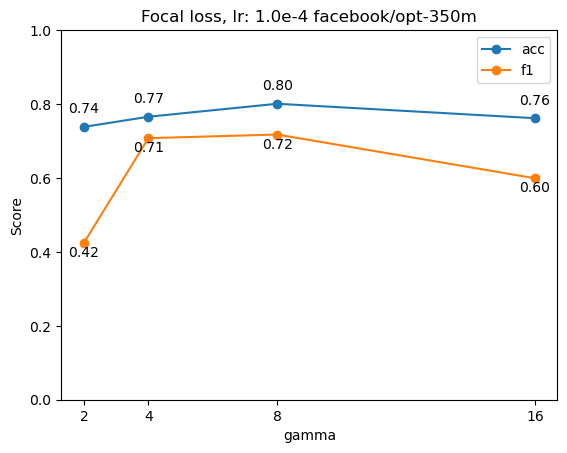

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-4 {model_checkpoint}')